# Stock Price Prediction


# Glossary
<font size=5><hr>
1.[Library Imports](#li)
<br>
2.[Dataset Validation](#dv)
<br>
3.[Dataset Visualization](#dvv)
<br>
4.[Preprocessing](#pp)
<br>
5.[Evaluation](#ev)

## Library Imports <a id='li'></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## Dataset Validation <a id='dv'></a>

### Data Gathering

This a dataset of the daily price of the Tesla stock(TSLA), in American Dollars (USD$), over the period of 5 years, since 02/01/2018 until 30/12/2022. The dataset was gathered from Yahoo Finance. The date will be the dataset's index. The dataset's features are as following:

- Open: The price from the first transaction of a business day.
<br>
- High: The highest price at which a stock is traded during the business day.
<br>
- Low: The lowest price at which a stock is traded during the business day.
<br>
- Close: The last price anyone paid for a share of stock during a business day.
<br>
- Adj Close: The closing price after adjustments for all applicable splits and dividend distributions.
<br>
- Volume: The number of shares traded in a stock or contracts traded in futures or options (indicates market strength).
<br>
<br>

In [3]:
TSLA = pd.read_csv("TSLA.csv")
TSLA.set_index("Date", drop=True, inplace=True)

In [4]:
TSLA


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-18,25.350000,25.974001,25.178667,25.666668,25.666668,107820000
2017-09-19,25.333332,25.492666,24.904667,25.006666,25.006666,96778500
2017-09-20,24.866667,25.216667,24.738001,24.927334,24.927334,73786500
2017-09-21,24.993334,25.122000,24.300667,24.431999,24.431999,69273000
2017-09-22,24.432667,24.660000,23.392000,23.406000,23.406000,122391000
...,...,...,...,...,...,...
2022-09-12,300.720001,305.489990,300.399994,304.420013,304.420013,48674600
2022-09-13,292.899994,297.399994,290.399994,292.130005,292.130005,68229600
2022-09-14,292.239990,306.000000,291.640015,302.609985,302.609985,72628700


In [5]:
TSLA.describe()


,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,121.335986,124.135435,118.313505,121.313569,121.313569,1.320049e+08
std,118.689726,121.405477,115.647051,118.567328,118.567328,9.025711e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,20.811667,21.127333,20.350667,20.781666,20.781666,7.542375e+07
50%,47.387333,49.579334,45.799999,48.302666,48.302666,1.016115e+08
75%,233.383331,238.436661,227.154999,233.135002,233.135002,1.526895e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


## Data Visulization <a id='dvv'></a>

### Univariate

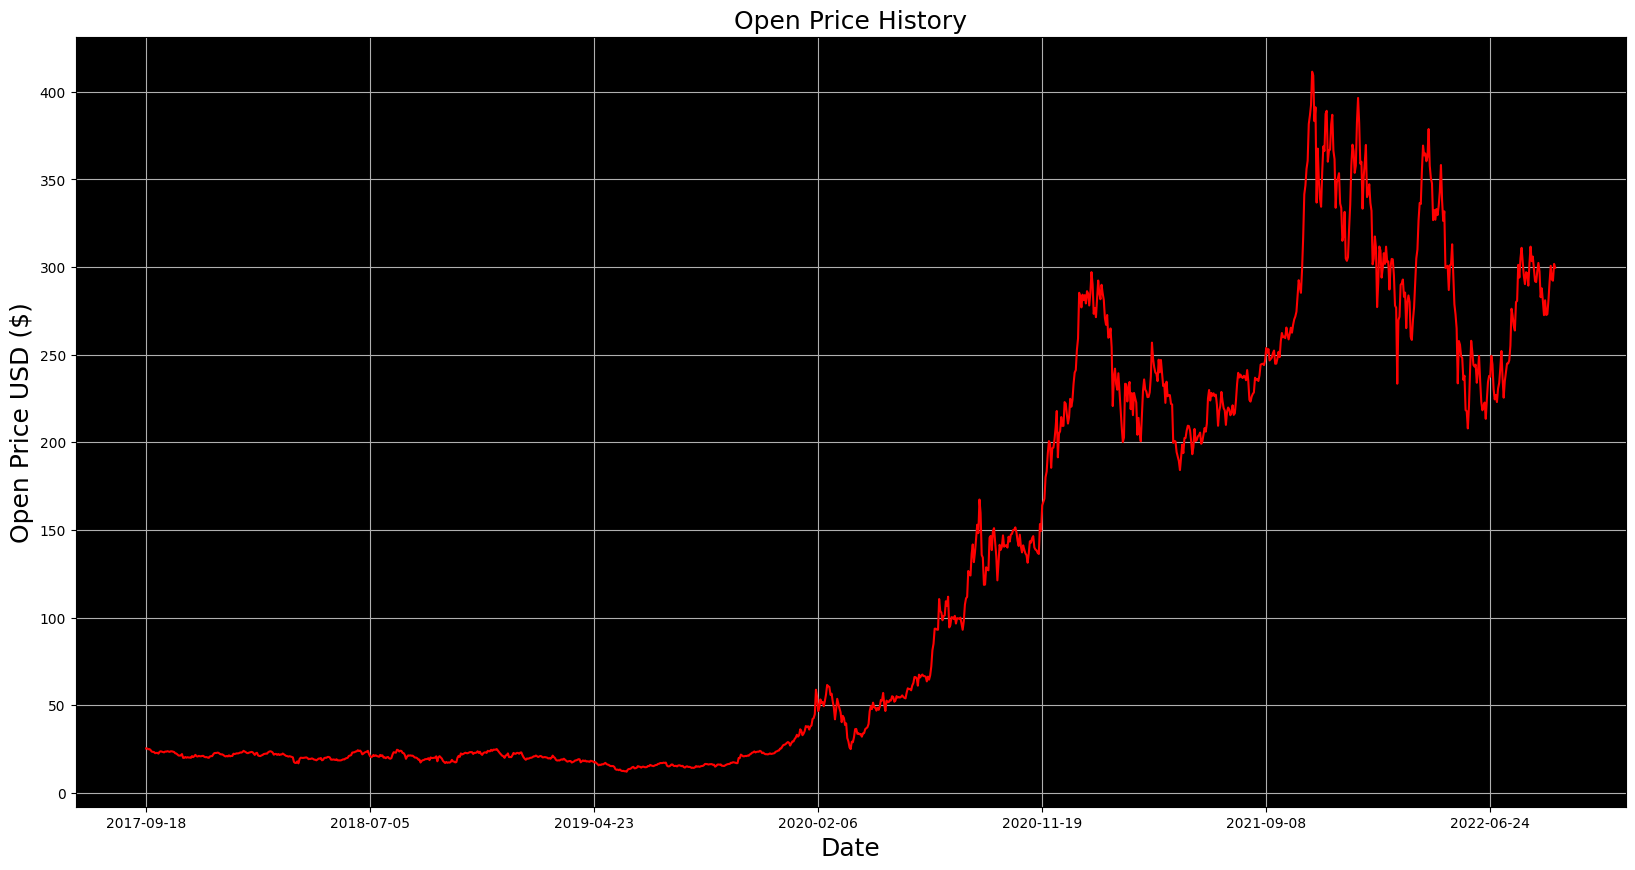

In [6]:
plt.title("Open Price History", fontsize=18)
TSLA["Open"].plot(figsize=(20, 10), color="#ff0000")
plt.ylabel("Open Price USD ($)", fontsize=18)
plt.xlabel("Date", fontsize=18)
BC = plt.gca()
BC.set_facecolor("xkcd:black")
plt.grid()
plt.show()

It appears that at the start of 2020 Tesla has started gaining some fame and so did their stock. The stock started increasing rapidly up until early 2022.

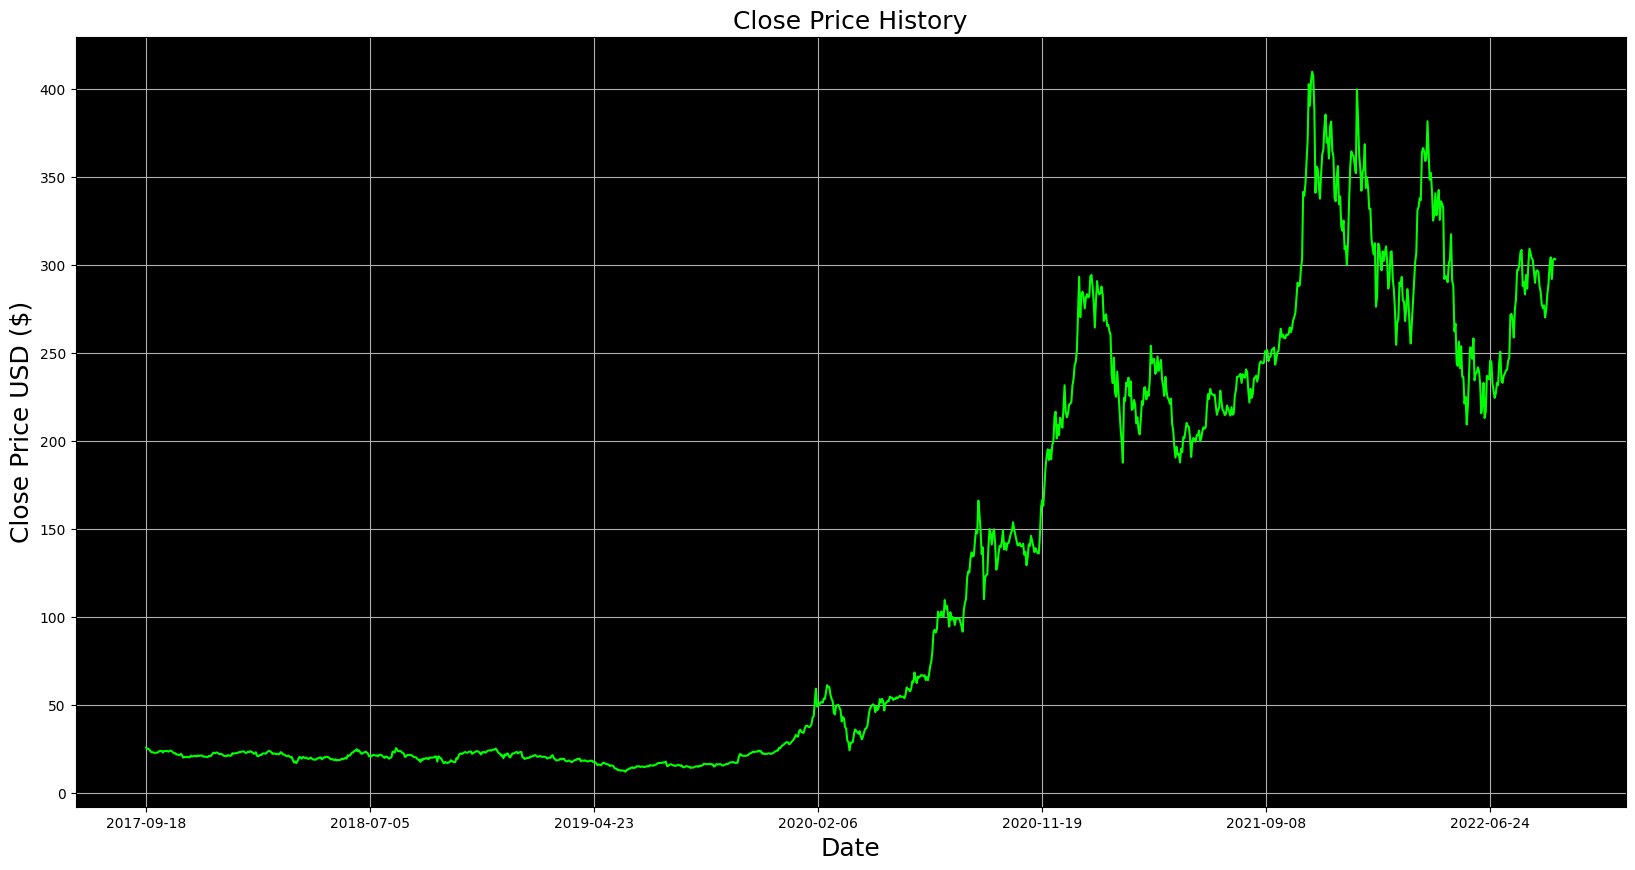

In [7]:
plt.title("Close Price History", fontsize=18)
TSLA["Close"].plot(figsize=(20, 10), color="#00ff00")
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.xlabel("Date", fontsize=18)
BC = plt.gca()
BC.set_facecolor("xkcd:black")
plt.grid()
plt.show()

The Close prices are almost similar to the Open prices. However, during the day, prices may jump suddenly to high prices.

**bold text**### Bivariate

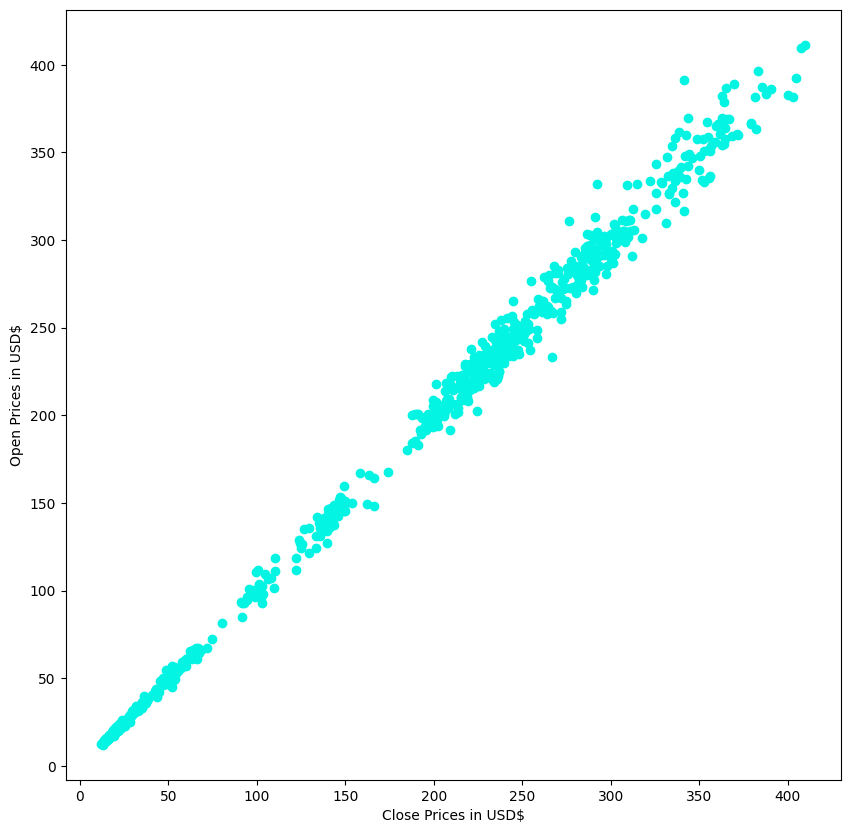

In [8]:
plt.figure(figsize=(10, 10))
plt.scatter(TSLA["Close"], TSLA["Open"], color="#03f4e3")
plt.xlabel("Close Prices in USD$")
plt.ylabel("Open Prices in USD$")
plt.show()

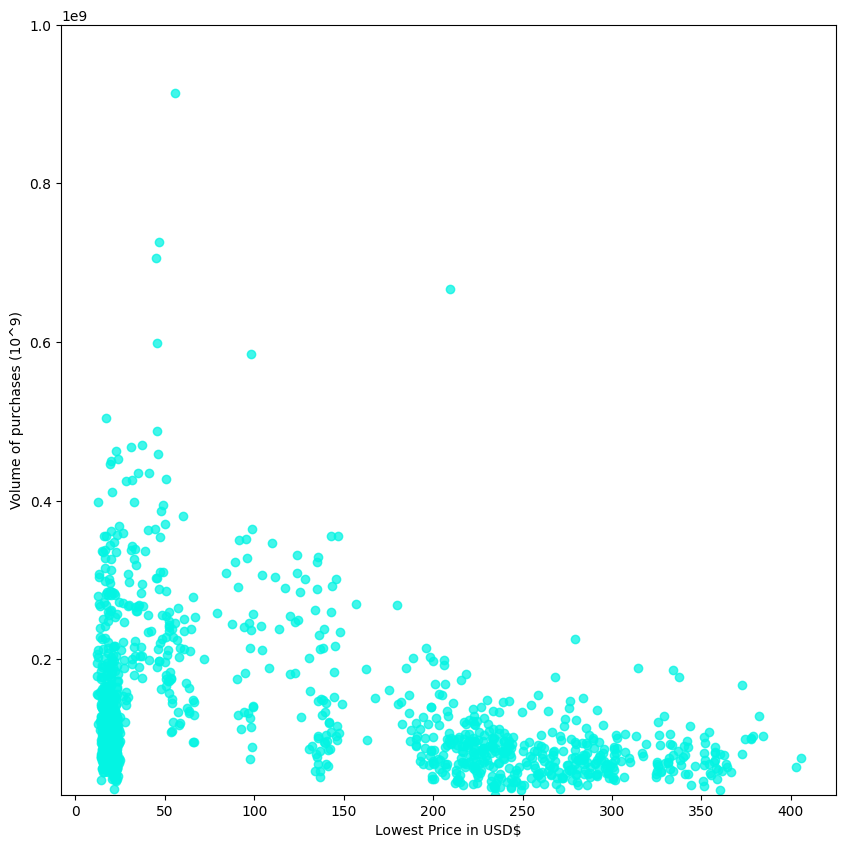

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(TSLA["Low"], TSLA["Volume"], color="#03f4e3", alpha=0.75)
plt.xlabel("Lowest Price in USD$")
plt.ylabel("Volume of purchases (10^9)")
plt.ylim([2.940180e07, 1e09])
plt.show()

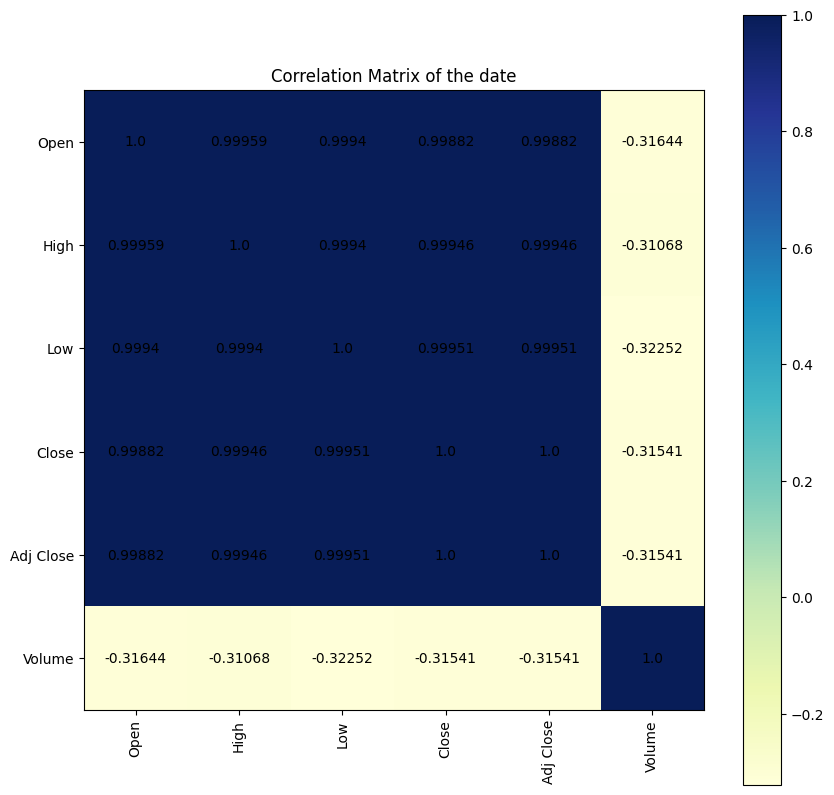

In [10]:
corr = TSLA.corr()
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap="YlGnBu", interpolation="nearest")
plt.colorbar()
for i in range(6):
    for j in range(6):
        plt.annotate(
            str(round(corr.values[i][j], 5)),
            xy=(j, i),
            ha="center",
            va="center",
            color="black",
        )
plt.title("Correlation Matrix of the date")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


Most of the features are colored Navy (High correlation) in the heatmap because the values are close to each other except the volume values. The volume has no correlation with the other features, therefore, we can't deduce any information from the heatmap. This makes us think about dropping the volume column.

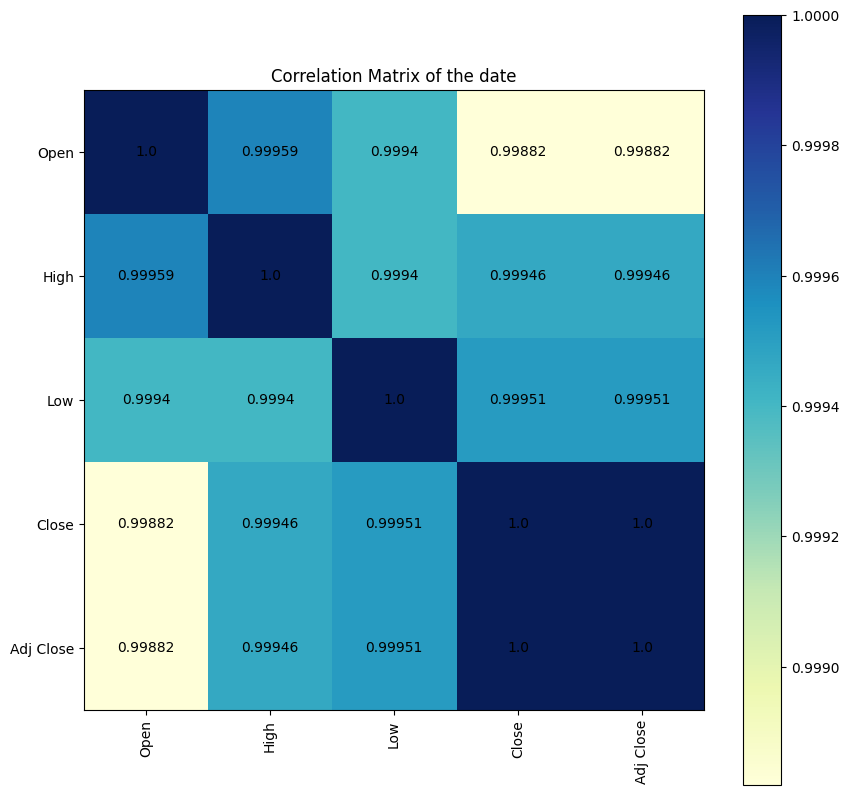

In [11]:
corr = TSLA[["Open", "High", "Low", "Close", "Adj Close"]].corr()
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap="YlGnBu", interpolation="nearest")
plt.colorbar()
for i in range(5):
    for j in range(5):
        plt.annotate(
            str(round(corr.values[i][j], 5)),
            xy=(j, i),
            ha="center",
            va="center",
            color="black",
        )
plt.title("Correlation Matrix of the date")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


This heatmap makes more sense and more understandable without the volume feature.

## Preprocessing<a id='pp'></a>

In [12]:
x = TSLA[["Open", "Low", "High"]]
y = TSLA["Close"]
xTrain, xTest, yTrain, yTest = train_test_split(
    x.values,
    y.values,
    test_size=0.25
)

### K-Fold Utilization

#### Random Forest using Grid Search CV

Grid Search CV passes the set of hyperparameters and calculate the score and gives the best set of hyperparameters which gives the best score as an output. The best hyperparameters that were found by the Grid Search CV are then fed to the Random Forest Regressor model and then the model is fit.

In [13]:
rf = RandomForestRegressor()
rfg = {
    "n_estimators": [20, 50, 100, 200, 500, 1000],
    "max_depth": np.arange(1, 15, 1)
    }

rf_gscv = GridSearchCV(
    estimator=rf,
    param_grid=rfg,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)

rf_gscv_fit = rf_gscv.fit(xTrain, yTrain)

rf_best_parameters = rf_gscv_fit.best_params_
print(rf_best_parameters)

{'max_depth': 12, 'n_estimators': 200}


In [14]:
rf_best_fit = rf_gscv_fit.best_estimator_
rf_best_fit.fit(xTrain, yTrain)
rf_yPrediction = rf_best_fit.predict(xTest)

#### AdaBoost Regressor using Random Forest Regressor Model

The best hyperparameters that were found by the Grid search CV in the previous model are fed to the AdaBoost model.

In [15]:
rf_adb = AdaBoostRegressor( estimator=RandomForestRegressor(
                            max_depth=rf_best_parameters['max_depth'],
                            n_estimators=rf_best_parameters['n_estimators'])
                            )

rf_adb

AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=12,
                                                  n_estimators=200))

In [16]:
rf_adb_fit = rf_adb.fit(xTrain,yTrain)
rf_adb_yPrediction = rf_adb_fit.predict(xTest)


#### Support Vector Regressor (SVR) using Grid Search CV

In [17]:
svr = SVR()

svrg = {
    'kernel': ['rbf'],
    'C' : [1e2, 1e3, 1e4, 1e5],
    'gamma' : [1e-3, 1e-4]
}

svr_gscv = GridSearchCV(
    estimator = svr,
    param_grid = svrg,
    scoring = 'neg_mean_squared_error',
    cv = 5,
    n_jobs = -1
    )

svr_gscv_fit = svr_gscv.fit(xTrain, yTrain)

svr_best_parameters = svr_gscv_fit.best_params_
print(svr_best_parameters)

{'C': 1000.0, 'gamma': 0.0001, 'kernel': 'rbf'}


In [18]:
svr_best_fit = svr_gscv_fit.best_estimator_
svr_best_fit.fit(xTrain, yTrain)
svr_yPrediction = svr_best_fit.predict(xTest)

### Regularization

#### Elastic Net

In [19]:
eln = ElasticNet()

elng = {
    'alpha' : [ 1e-3, 1e-2, 1e-1, 1],
    'l1_ratio' : np.arange(0, 1, 0.01),
    'max_iter' : [2000, 4000, 6000, 8000, 10000]
}

elng_gscv = GridSearchCV(
    estimator=eln,
    param_grid=elng,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

elng_gscv_fit = elng_gscv.fit(xTrain, yTrain)

elng_best_parameters = elng_gscv_fit.best_params_
print(elng_best_parameters)

{'alpha': 0.1, 'l1_ratio': 0.1, 'max_iter': 8000}


In [20]:
eln_best_fit = elng_gscv_fit.best_estimator_
eln_best_fit.fit(xTrain, yTrain)
eln_yPrediction = eln_best_fit.predict(xTest)

## Evaluation <a id='ev'></a>

#### Random Forest using Grid Search CV Evaluation

These are all the searches that was done sorted by the rank test score column. Starting by the best parameters down until the worst. We can deduct that at depth 1 the ranking is the worst.

In [21]:
rf_df = pd.DataFrame(rf_gscv_fit.cv_results_)
rf_df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
69,0.840881,0.007771,0.016594,0.002546,12,200,"{'max_depth': 12, 'n_estimators': 200}",-7.694493,-11.210694,-15.486762,-10.995216,-14.117668,-11.900967,2.711567,1
75,0.818842,0.019249,0.014710,0.001848,13,200,"{'max_depth': 13, 'n_estimators': 200}",-7.632270,-11.233590,-15.329760,-10.961041,-14.384898,-11.908312,2.737769,2
70,2.088310,0.064428,0.038700,0.003716,12,500,"{'max_depth': 12, 'n_estimators': 500}",-7.853641,-10.823424,-15.404346,-11.111530,-14.733928,-11.985374,2.772323,3
65,4.102112,0.158813,0.074214,0.011597,11,1000,"{'max_depth': 11, 'n_estimators': 1000}",-7.762604,-11.084488,-15.471337,-10.921227,-14.727045,-11.993340,2.808707,4
81,0.843231,0.011358,0.016010,0.001880,14,200,"{'max_depth': 14, 'n_estimators': 200}",-8.137662,-11.168870,-15.614319,-11.043192,-14.111752,-12.015159,2.609428,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.643874,0.180614,0.035419,0.001301,1,500,"{'max_depth': 1, 'n_estimators': 500}",-1700.975811,-1391.055483,-1479.132672,-1684.086432,-2088.173888,-1668.684857,240.939437,80
3,0.704157,0.112071,0.015938,0.001021,1,200,"{'max_depth': 1, 'n_estimators': 200}",-1687.997422,-1398.192800,-1475.299945,-1693.279244,-2096.790450,-1670.311972,242.817914,81
5,3.016470,0.066461,0.072419,0.002087,1,1000,"{'max_depth': 1, 'n_estimators': 1000}",-1701.887360,-1400.810417,-1482.477056,-1676.322748,-2093.441562,-1670.987829,239.992727,82
0,0.075016,0.008940,0.005106,0.004259,1,20,"{'max_depth': 1, 'n_estimators': 20}",-1776.039801,-1406.090530,-1477.032681,-1685.925646,-2035.211228,-1676.059977,224.311518,83


In [22]:
rfr_MSE = round(metrics.mean_squared_error(yTest, rf_yPrediction), 3)
rfr_MAPE = round(100 * metrics.mean_absolute_percentage_error(yTest, rf_yPrediction), 3)
print("Random Forest Performance Evaluation")
print("------------------------------------")
print("MSE: ", rfr_MSE)
print("RMSE: ", round(np.sqrt(rfr_MSE),3))
print("MAPE: ", rfr_MAPE, "%")

Random Forest Performance Evaluation
------------------------------------
MSE:  12.199
RMSE:  3.493
MAPE:  1.373 %


In [23]:
TSLA["RF Predicted Close"] = rf_best_fit.predict(TSLA[["Open", "High", "Low"]].values)

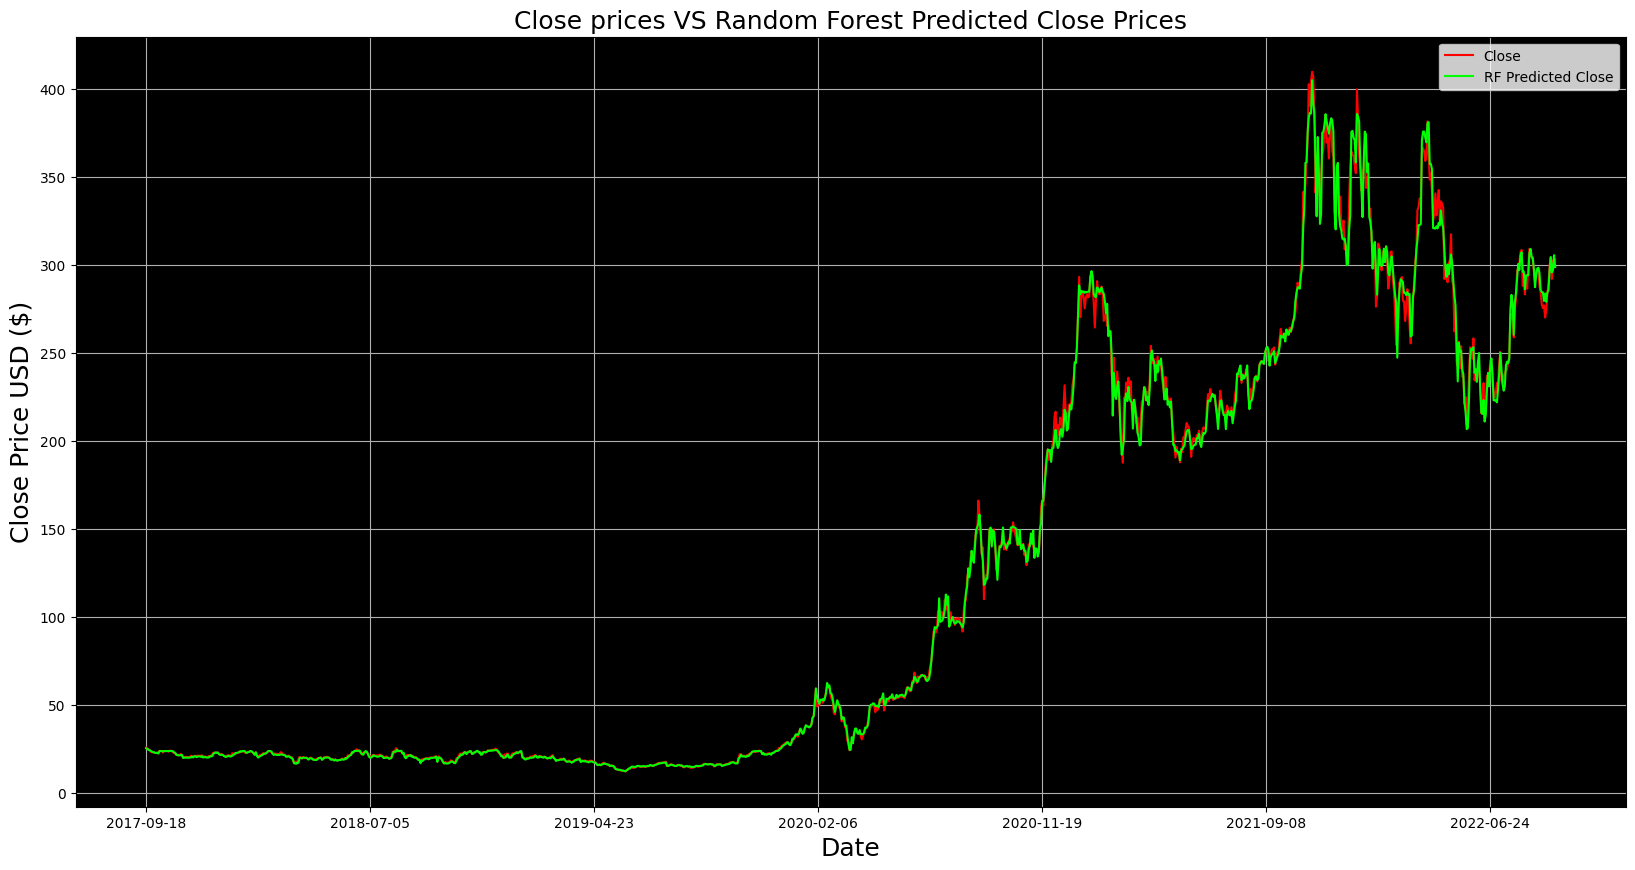

In [24]:
plt.title("Close prices VS Random Forest Predicted Close Prices", fontsize=18)
TSLA["Close"].plot(figsize=(20, 10), color="#ff0000")
TSLA["RF Predicted Close"].plot(figsize=(20, 10), color="#00ff00")
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.xlabel("Date", fontsize=18)
BC = plt.gca()
BC.set_facecolor("xkcd:black")
plt.grid()
plt.legend()
plt.show()


#### AdaBoost using Random Forest Estimator Evaluation

Using the best hyperparameters that were obtained by the Grid Search CV of the Random Forest Model, AdaBoost was applied using Random Forest as the Estimator (Model) and the best hyperparameters of it.

In [25]:
rf_adb_MSE = round(metrics.mean_squared_error(yTest, rf_adb_yPrediction), 3)
rf_adb_MAPE = round(100 * metrics.mean_absolute_percentage_error(yTest, rf_adb_yPrediction), 3)
print("AdaBoost Performance Evaluation")
print("-------------------------------")
print("MSE: ", rf_adb_MSE)
print("RMSE: ", round(np.sqrt(rf_adb_MSE),3))
print("MAPE: ", rf_adb_MAPE, "%")

AdaBoost Performance Evaluation
-------------------------------
MSE:  12.741
RMSE:  3.569
MAPE:  1.405 %


In [26]:
TSLA["ADB Predicted Close"] = rf_adb_fit.predict(TSLA[["Open", "High", "Low"]].values)
TSLA

,Open,High,Low,Close,Adj Close,Volume,RF Predicted Close,ADB Predicted Close
Date,,,,,,,,
2017-09-18,25.350000,25.974001,25.178667,25.666668,25.666668,107820000,25.254936,25.372936
2017-09-19,25.333332,25.492666,24.904667,25.006666,25.006666,96778500,24.998579,25.104693
2017-09-20,24.866667,25.216667,24.738001,24.927334,24.927334,73786500,24.381757,24.994016
2017-09-21,24.993334,25.122000,24.300667,24.431999,24.431999,69273000,24.201859,24.688334
2017-09-22,24.432667,24.660000,23.392000,23.406000,23.406000,122391000,23.888937,24.024153
...,...,...,...,...,...,...,...,...
2022-09-12,300.720001,305.489990,300.399994,304.420013,304.420013,48674600,304.577880,304.298453
2022-09-13,292.899994,297.399994,290.399994,292.130005,292.130005,68229600,295.901184,297.380397
2022-09-14,292.239990,306.000000,291.640015,302.609985,302.609985,72628700,297.208801,300.285386


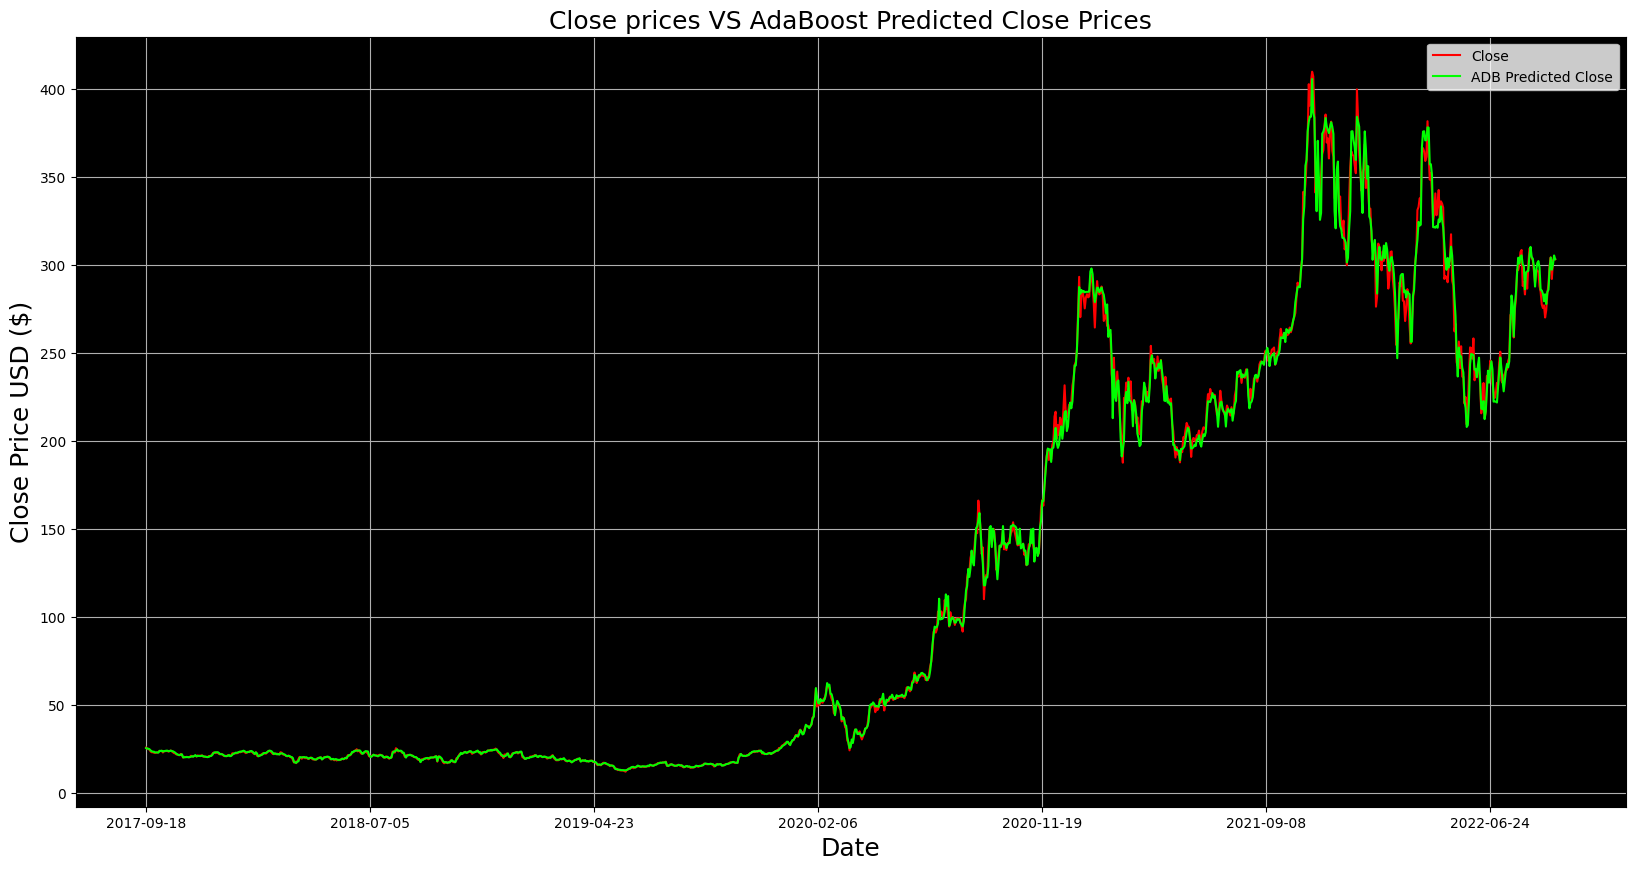

In [27]:
plt.title("Close prices VS AdaBoost Predicted Close Prices", fontsize=18)
TSLA["Close"].plot(figsize=(20, 10), color="#ff0000")
TSLA["ADB Predicted Close"].plot(figsize=(20, 10), color="#00ff00")
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.xlabel("Date", fontsize=18)
BC = plt.gca()
BC.set_facecolor("xkcd:black")
plt.grid()
plt.legend()
plt.show()


#### Support Vector Regressor using Grid Search CV Evaluation

Similar to what was earlier done with the Random Forrest grid search CV, a grid search CV is done to find the best hyperparameters for a Support Vector Regressor. We can notice that as the gamma decreases the scoring gets better and better.

In [28]:
svr_df = pd.DataFrame(svr_gscv_fit.cv_results_)
svr_df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.236613,0.054517,0.021827,0.003861,1000.0,0.0001,rbf,"{'C': 1000.0, 'gamma': 0.0001, 'kernel': 'rbf'}",-6.785585,-2.985450,-8.221118,-7.878957,-11.402611,-7.454744,2.712021,1
5,1.333698,0.199309,0.018387,0.000825,10000.0,0.0001,rbf,"{'C': 10000.0, 'gamma': 0.0001, 'kernel': 'rbf'}",-7.537792,-4.513842,-8.081801,-8.396057,-13.728858,-8.451670,2.977592,2
1,0.060163,0.006113,0.032052,0.017586,100.0,0.0001,rbf,"{'C': 100.0, 'gamma': 0.0001, 'kernel': 'rbf'}",-6.923339,-4.360667,-8.076506,-9.572014,-16.785864,-9.143678,4.184076,3
7,9.153143,0.719000,0.013923,0.003057,100000.0,0.0001,rbf,"{'C': 100000.0, 'gamma': 0.0001, 'kernel': 'rbf'}",-9.807515,-5.445285,-8.237002,-8.726785,-20.420313,-10.527380,5.151776,4
2,0.494375,0.129694,0.020143,0.006217,1000.0,0.001,rbf,"{'C': 1000.0, 'gamma': 0.001, 'kernel': 'rbf'}",-20.448062,-15.837305,-10.471499,-16.423393,-65.754744,-25.787001,20.234441,5
4,4.691923,0.433555,0.015745,0.002667,10000.0,0.001,rbf,"{'C': 10000.0, 'gamma': 0.001, 'kernel': 'rbf'}",-13.431256,-25.991546,-15.045485,-21.416226,-85.490795,-32.275062,26.986139,6
0,0.119923,0.033732,0.020029,0.002283,100.0,0.001,rbf,"{'C': 100.0, 'gamma': 0.001, 'kernel': 'rbf'}",-18.576507,-5.706871,-11.805266,-12.388797,-121.503342,-33.996156,43.942850,7
6,32.255293,6.418536,0.007823,0.000740,100000.0,0.001,rbf,"{'C': 100000.0, 'gamma': 0.001, 'kernel': 'rbf'}",-27.517926,-90.907840,-56.195690,-28.045153,-279.328025,-96.398927,94.367725,8


In [29]:
svr_MSE = round(metrics.mean_squared_error(yTest, svr_yPrediction), 3)
svr_MAPE = round(100 * metrics.mean_absolute_percentage_error(yTest, svr_yPrediction), 3)
print("Support Vector Regressor Performance Evaluation")
print("-----------------------------------------------")
print("MSE: ", svr_MSE)
print("RMSE: ", round(np.sqrt(svr_MSE),3))
print("MAPE: ", svr_MAPE, "%")

Support Vector Regressor Performance Evaluation
-----------------------------------------------
MSE:  6.742
RMSE:  2.597
MAPE:  1.009 %


In [30]:
TSLA["SVR Predicted Close"] = svr_best_fit.predict(TSLA[["Open", "High", "Low"]].values)
TSLA

,Open,High,Low,Close,Adj Close,Volume,RF Predicted Close,ADB Predicted Close,SVR Predicted Close
Date,,,,,,,,,
2017-09-18,25.350000,25.974001,25.178667,25.666668,25.666668,107820000,25.254936,25.372936,25.816157
2017-09-19,25.333332,25.492666,24.904667,25.006666,25.006666,96778500,24.998579,25.104693,25.188093
2017-09-20,24.866667,25.216667,24.738001,24.927334,24.927334,73786500,24.381757,24.994016,25.116851
2017-09-21,24.993334,25.122000,24.300667,24.431999,24.431999,69273000,24.201859,24.688334,24.605231
2017-09-22,24.432667,24.660000,23.392000,23.406000,23.406000,122391000,23.888937,24.024153,23.844701
...,...,...,...,...,...,...,...,...,...
2022-09-12,300.720001,305.489990,300.399994,304.420013,304.420013,48674600,304.577880,304.298453,301.987651
2022-09-13,292.899994,297.399994,290.399994,292.130005,292.130005,68229600,295.901184,297.380397,293.422409
2022-09-14,292.239990,306.000000,291.640015,302.609985,302.609985,72628700,297.208801,300.285386,296.954646


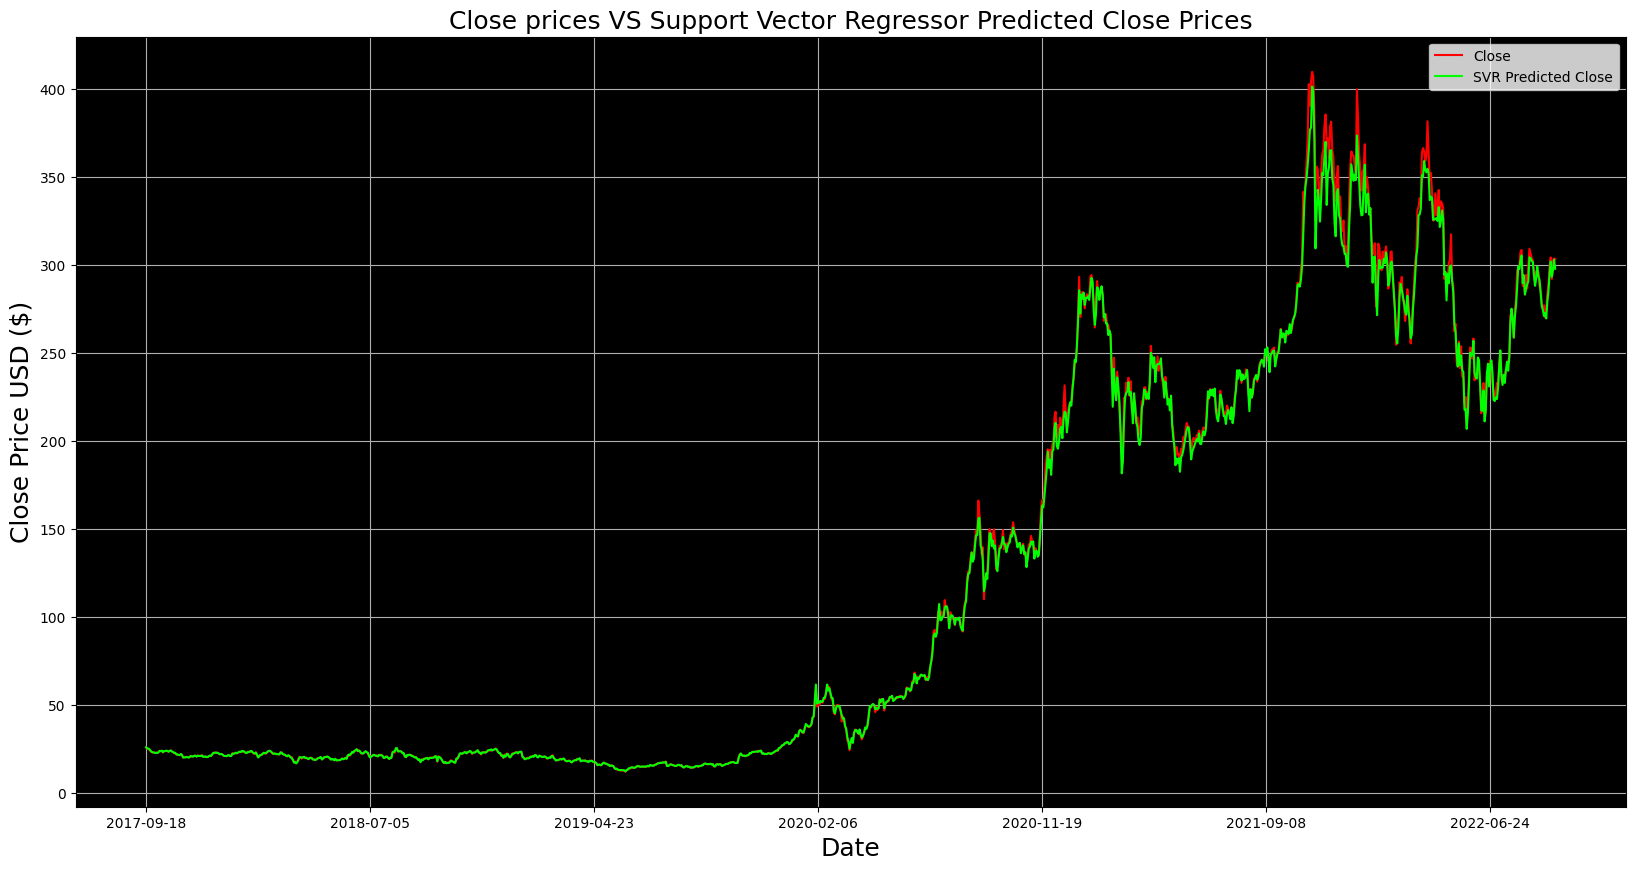

In [31]:
plt.title("Close prices VS Support Vector Regressor Predicted Close Prices", fontsize=18)
TSLA["Close"].plot(figsize=(20, 10), color="#ff0000")
TSLA["SVR Predicted Close"].plot(figsize=(20, 10), color="#00ff00")
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.xlabel("Date", fontsize=18)
BC = plt.gca()
BC.set_facecolor("xkcd:black")
plt.grid()
plt.legend()
plt.show()

#### Elastic Net Regression Evaluation

In [32]:
eln_df = pd.DataFrame(elng_gscv_fit.cv_results_)
eln_df.sort_values(by="rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1053,0.019423,0.002058,0.000401,0.000491,0.1,0.1,8000,"{'alpha': 0.1, 'l1_ratio': 0.1, 'max_iter': 8000}",-7.155847,-3.636611,-7.353969,-7.600971,-6.563546,-6.462189,1.453783,1
1054,0.020483,0.002002,0.000628,0.000575,0.1,0.1,10000,"{'alpha': 0.1, 'l1_ratio': 0.1, 'max_iter': 10...",-7.155847,-3.636611,-7.353969,-7.600971,-6.563546,-6.462189,1.453783,1
1058,0.020054,0.001264,0.000578,0.000474,0.1,0.11,8000,"{'alpha': 0.1, 'l1_ratio': 0.11, 'max_iter': 8...",-7.159547,-3.636172,-7.354372,-7.601585,-6.561215,-6.462578,1.454421,3
1059,0.020340,0.001336,0.000987,0.000029,0.1,0.11,10000,"{'alpha': 0.1, 'l1_ratio': 0.11, 'max_iter': 1...",-7.159547,-3.636172,-7.354372,-7.601585,-6.561215,-6.462578,1.454421,3
1048,0.019321,0.001720,0.000601,0.000491,0.1,0.09,8000,"{'alpha': 0.1, 'l1_ratio': 0.09, 'max_iter': 8...",-7.152744,-3.643393,-7.351479,-7.600370,-6.565860,-6.462769,1.450484,5
1049,0.020649,0.001735,0.000540,0.000635,0.1,0.09,10000,"{'alpha': 0.1, 'l1_ratio': 0.09, 'max_iter': 1...",-7.152744,-3.643393,-7.351479,-7.600370,-6.565860,-6.462769,1.450484,5
1063,0.019516,0.001284,0.000302,0.000603,0.1,0.12,8000,"{'alpha': 0.1, 'l1_ratio': 0.12, 'max_iter': 8...",-7.164070,-3.635751,-7.354783,-7.602207,-6.558939,-6.463150,1.455136,7
1064,0.020034,0.000900,0.000201,0.000401,0.1,0.12,10000,"{'alpha': 0.1, 'l1_ratio': 0.12, 'max_iter': 1...",-7.164070,-3.635751,-7.354783,-7.602207,-6.558939,-6.463150,1.455136,7
1002,0.014524,0.000541,0.000400,0.000490,0.1,0.0,6000,"{'alpha': 0.1, 'l1_ratio': 0.0, 'max_iter': 6000}",-7.240760,-3.621035,-7.371223,-7.610481,-6.475134,-6.463727,1.471285,9
1007,0.017502,0.001462,0.000200,0.000399,0.1,0.01,6000,"{'alpha': 0.1, 'l1_ratio': 0.01, 'max_iter': 6...",-7.240540,-3.621242,-7.371271,-7.610549,-6.475186,-6.463758,1.471199,10


In [33]:
eln_MSE = round(metrics.mean_squared_error(yTest, eln_yPrediction), 3)
eln_MAPE = round(100 * metrics.mean_absolute_percentage_error(yTest, eln_yPrediction), 3)
print("Elastic Net Performance Evaluation")
print("----------------------------------")
print("MSE: ", eln_MSE)
print("RMSE: ", round(np.sqrt(eln_MSE),3))
print("MAPE: ", eln_MAPE, "%")

Elastic Net Performance Evaluation
----------------------------------
MSE:  4.951
RMSE:  2.225
MAPE:  0.97 %


In [34]:
TSLA["ELN Predicted Close"] = eln_best_fit.predict(TSLA[["Open", "High", "Low"]].values)
TSLA

,Open,High,Low,Close,Adj Close,Volume,RF Predicted Close,ADB Predicted Close,SVR Predicted Close,ELN Predicted Close
Date,,,,,,,,,,
2017-09-18,25.350000,25.974001,25.178667,25.666668,25.666668,107820000,25.254936,25.372936,25.816157,25.741411
2017-09-19,25.333332,25.492666,24.904667,25.006666,25.006666,96778500,24.998579,25.104693,25.188093,25.141368
2017-09-20,24.866667,25.216667,24.738001,24.927334,24.927334,73786500,24.381757,24.994016,25.116851,25.085838
2017-09-21,24.993334,25.122000,24.300667,24.431999,24.431999,69273000,24.201859,24.688334,24.605231,24.546195
2017-09-22,24.432667,24.660000,23.392000,23.406000,23.406000,122391000,23.888937,24.024153,23.844701,23.756244
...,...,...,...,...,...,...,...,...,...,...
2022-09-12,300.720001,305.489990,300.399994,304.420013,304.420013,48674600,304.577880,304.298453,301.987651,303.707360
2022-09-13,292.899994,297.399994,290.399994,292.130005,292.130005,68229600,295.901184,297.380397,293.422409,293.775745
2022-09-14,292.239990,306.000000,291.640015,302.609985,302.609985,72628700,297.208801,300.285386,296.954646,301.904094


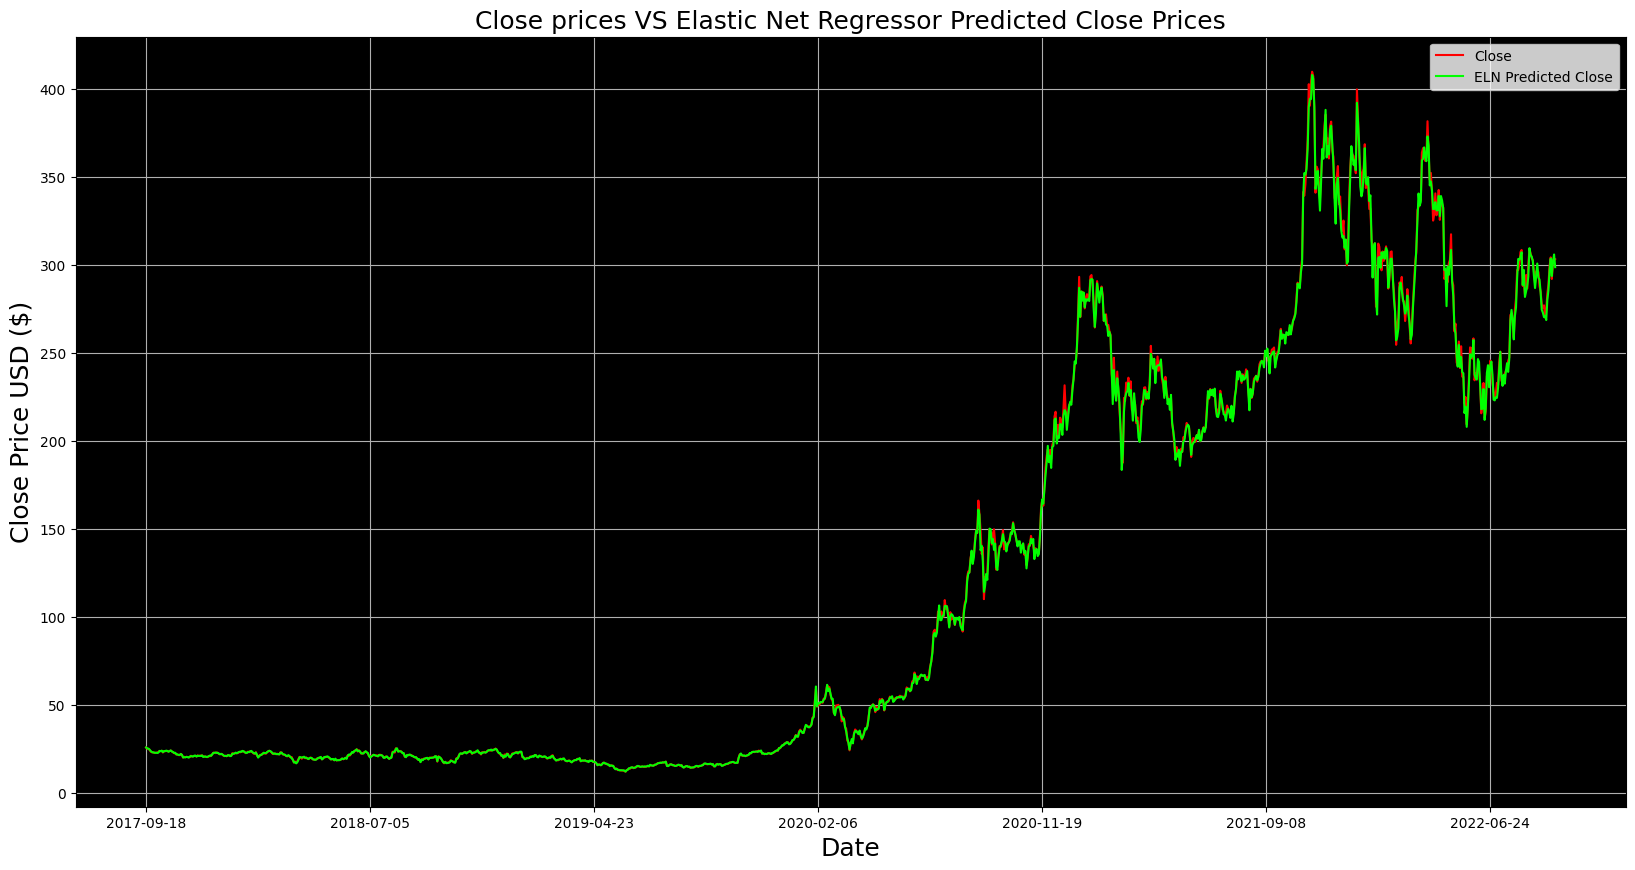

In [35]:
plt.title("Close prices VS Elastic Net Regressor Predicted Close Prices", fontsize=18)
TSLA["Close"].plot(figsize=(20, 10), color="#ff0000")
TSLA["ELN Predicted Close"].plot(figsize=(20, 10), color="#00ff00")
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.xlabel("Date", fontsize=18)
BC = plt.gca()
BC.set_facecolor("xkcd:black")
plt.grid()
plt.legend()
plt.show()

#### Model Rankings Comparison


In [36]:
ranks = {
    'Model' : ['Random Forrest','AdaBoost Random Forrest','Support Vector Regressor','Elastic Net'],
    'MAPE' : [rfr_MAPE,rfr_MAPE,svr_MAPE,eln_MAPE]
}

rank = pd.DataFrame(ranks)
rank = rank.sort_values(by='MAPE',ascending=True)
rank

,Model,MAPE
3,Elastic Net,0.970
2,Support Vector Regressor,1.009
0,Random Forrest,1.373
1,AdaBoost Random Forrest,1.373


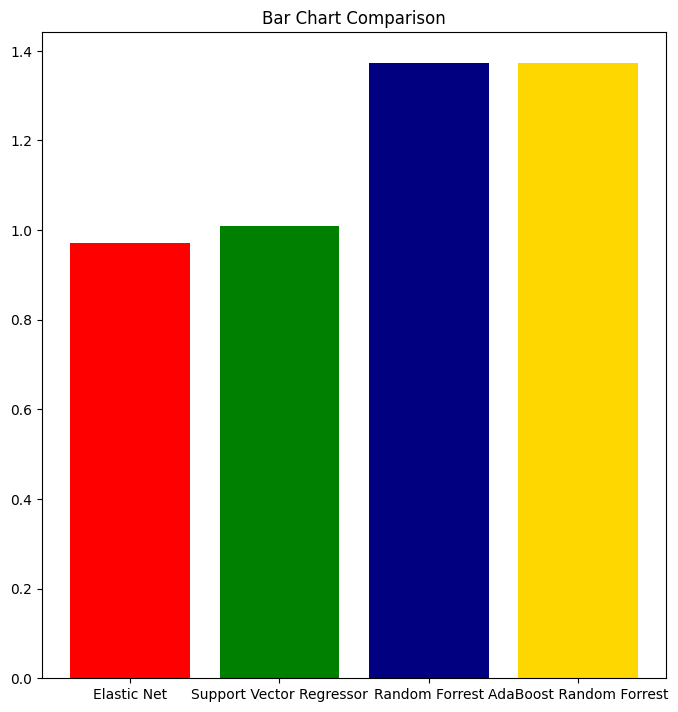

In [37]:
colors = ['red','green','navy','gold']
plt.figure(figsize=(7,7))
plt.bar(rank['Model'],rank['MAPE'],color=colors)
plt.tight_layout()
plt.title('Bar Chart Comparison')
plt.show()

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Flatten
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [40]:
data = pd.read_csv("TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-18,25.350000,25.974001,25.178667,25.666668,25.666668,107820000
1,2017-09-19,25.333332,25.492666,24.904667,25.006666,25.006666,96778500
2,2017-09-20,24.866667,25.216667,24.738001,24.927334,24.927334,73786500
3,2017-09-21,24.993334,25.122000,24.300667,24.431999,24.431999,69273000
4,2017-09-22,24.432667,24.660000,23.392000,23.406000,23.406000,122391000


In [41]:
data[["Adj Close"]].values

array([[ 25.666668],
       [ 25.006666],
       [ 24.927334],
       ...,
       [302.609985],
       [303.75    ],
       [303.350006]])

In [43]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(data[["Adj Close"]].values)
data["scale_Adj"] = scale.transform(data[["Adj Close"]].values)

In [44]:
data["scale_Adj"]

0      -0.807009
1      -0.812578
2      -0.813247
3      -0.817426
4      -0.826083
          ...   
1254    1.544938
1255    1.441243
1256    1.529666
1257    1.539285
1258    1.535910
Name: scale_Adj, Length: 1259, dtype: float64

In [45]:
# Separate train and test data
train_length = int(len(data["scale_Adj"]) * 0.8)
print('Train length: ', train_length)

train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', len(train_data), len(test_data))

Train length:  1007
Shape of Train and Test data:  1007 252


In [46]:
def prepare_data(timeseries_data,n_feature):
    x,y = [] , []
    for i in range(len(timeseries_data)):
        end_ind = i + n_feature
        if end_ind > len(timeseries_data)-1:
            break
        seq_x,seq_y = timeseries_data[i:end_ind], timeseries_data[end_ind]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x),np.array(y)

In [47]:
feature = 3
x_train , y_train = prepare_data(train_data["Adj Close"],feature)
x_test , y_test = prepare_data(test_data["Adj Close"].reset_index(drop=True),feature)

In [48]:
x_train.shape , y_train.shape, x_test.shape , y_test.shape

((1004, 3), (1004,), (249, 3), (249,))

In [49]:
# 2D to 3D
# reshape (1004, 3) to (1004, 3, 1)

x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],1))


In [50]:
# Build Model
model = Sequential([
 LSTM(32,activation="relu",return_sequences=False,input_shape=(feature,1)),
 Dense(1),
])
model.compile(optimizer="adam",loss="mse")
history =  model.fit(x_train,y_train,epochs=80,batch_size=32,validation_split=0.1,verbose=0)

Text(0.5, 0, 'epoch')

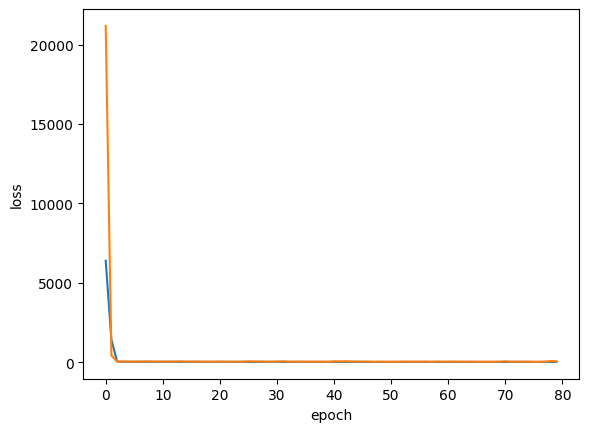

In [51]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylabel('loss')
plt.xlabel('epoch')

In [52]:
import math
from sklearn.metrics import mean_squared_error

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
def measure_rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

train_error = measure_rmse(y_train, train_predict)
test_error = measure_rmse(y_test, test_predict)

print('Train and Test RMSE: ', train_error, test_error)

8/8 [==============================] - 0s 1ms/step
Train and Test RMSE:  5.032576252090806 15.243033944514709


8/8 [==============================] - 0s 1ms/step


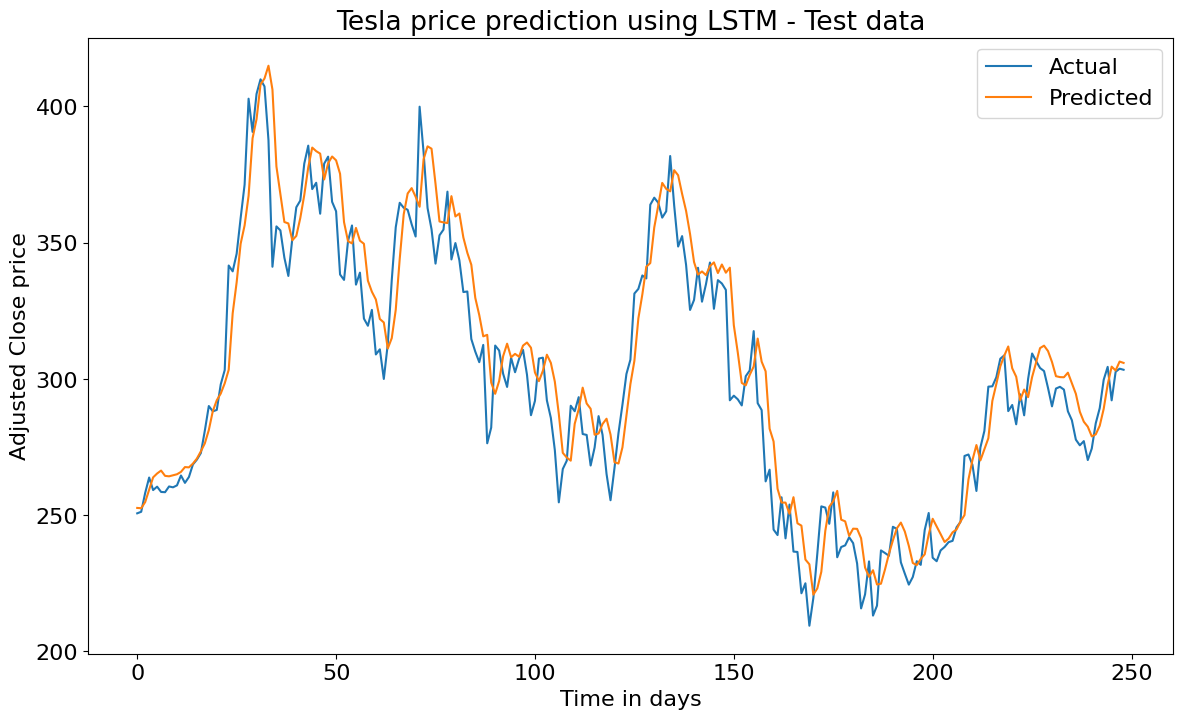

In [53]:
# train_predi = model.predict(x_train)
test_predi = model.predict(x_test)
plt.rc("figure", figsize=(14,8))
plt.rcParams.update({'font.size': 16})
plt.plot(y_test, label = 'Actual')
plt.plot(test_predi, label = 'Predicted')
plt.xlabel('Time in days')
plt.ylabel('Adjusted Close price')
plt.title('Tesla price prediction using LSTM - Test data')
plt.legend()
plt.show()